In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%load_ext autoreload
%autoreload 2
import h5py
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [2]:
import numpy as np
import itertools
from scipy.stats import norm
import time
import sys
sys.path.append("..")
from smfsmodels import cossio
import kinetics

### Molecular potential of mean force 

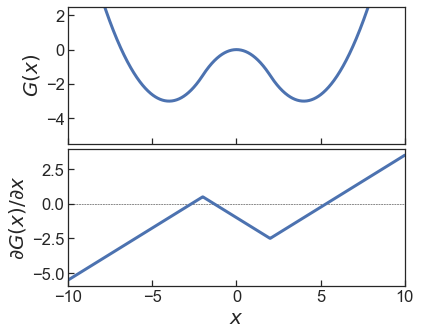

In [4]:
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(2,1, figsize=(6,5), sharex=True)
Gx = [cossio.Gx(y, barrier=3.) for y in x]
dGqxdx = [cossio.dGqxdx(0, y, barrier=3.) for y in x]
ax[0].plot(x, Gx, lw=3)
ax[0].set_ylabel('$G(x)$', fontsize=20)
ax[0].set_ylim(-1.1*5,0.5*5)

ax[1].plot(x, dGqxdx, lw=3)
ax[1].set_xlabel('$x$', fontsize=20)
ax[1].set_ylabel('$\partial G(x)/\partial x$', fontsize=20)
ax[1].hlines(0, -10, 10, linestyle='dashed', linewidth=0.5)

ax[1].set_xlim(-10,10)
#ax[2].set_ylabel('$\partial^2 G(x)/\partial x^2$', fontsize=20)

plt.tight_layout(h_pad=0.2)

In [5]:
x = np.linspace(-10,10,100)
q = np.linspace(-12,12,100)
kl_all = np.linspace(0,2,20)
G2d_all = []

for kl in kl_all:
    G2d = np.ones((100, 100), float)*[cossio.Gx(y, barrier=5.) \
                                      for y in x]
    for i, j in itertools.product(range(100), range(100)):
        G2d[i,j] += cossio.V(q[i], x[j], kl)
    G2d = np.array(G2d)
    G2d -= np.min(G2d)
    G2d_all.append(G2d)

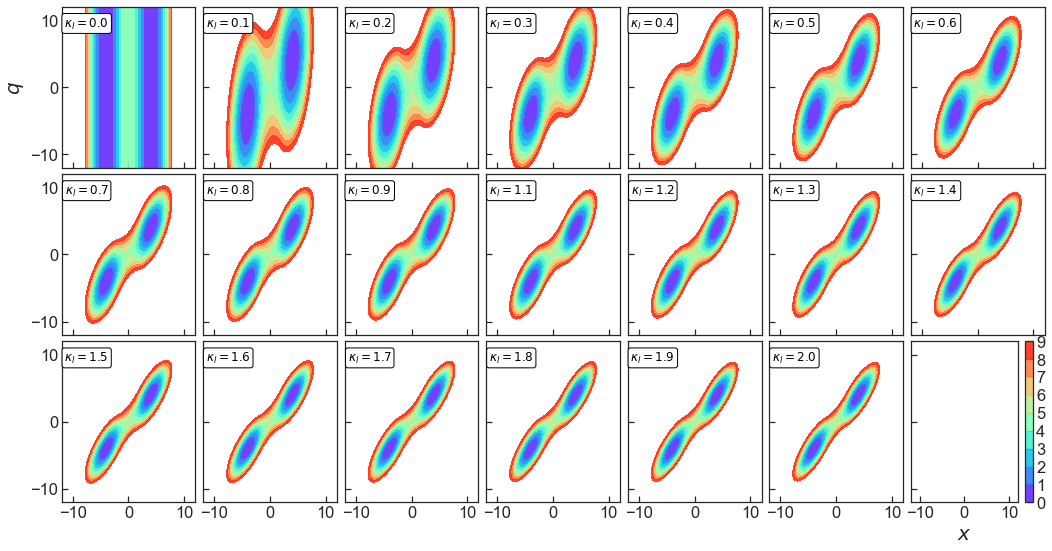

In [40]:
i = 0
fig, ax = plt.subplots(3, int(len(kl_all)/3) + 1, \
            figsize=(15,8), sharex=True, sharey=True)
ax = ax.flatten()
for i, G2d in enumerate(G2d_all):
    cs = ax[i].contourf(x, q,  G2d, cmap=cm.rainbow, \
                     levels=np.arange(0,10,1), alpha=0.9)
    ax[i].text(-7.5,9.5,'$\kappa_l=%2.1f$'%kl_all[i],
              {'color': 'black', 'fontsize': 12, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
    ax[i].set_xlim(-12,12)
    ax[i].set_ylim(-12,12)
cbar = plt.colorbar(cs)

ax[-1].set_xlabel('$x$', fontsize=20)
ax[0].set_ylabel('$q$', fontsize=20)
plt.tight_layout(w_pad=0, h_pad=0)

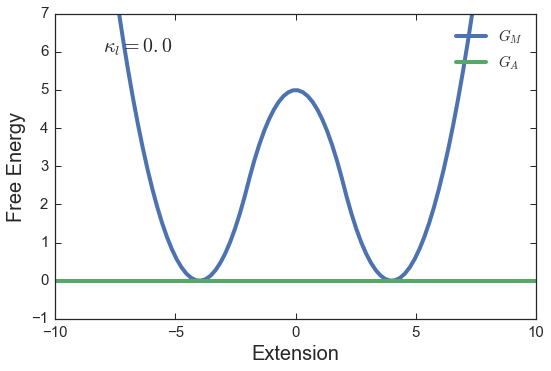

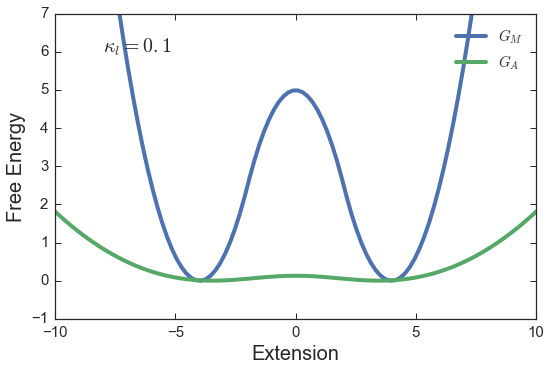

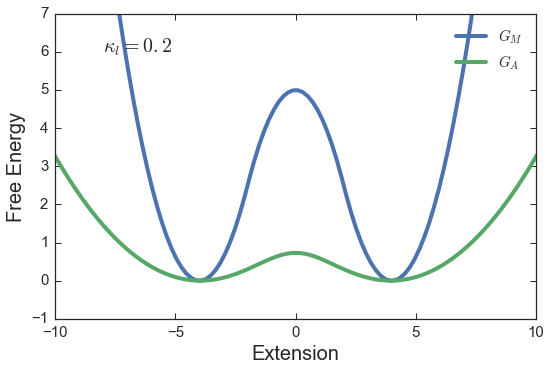

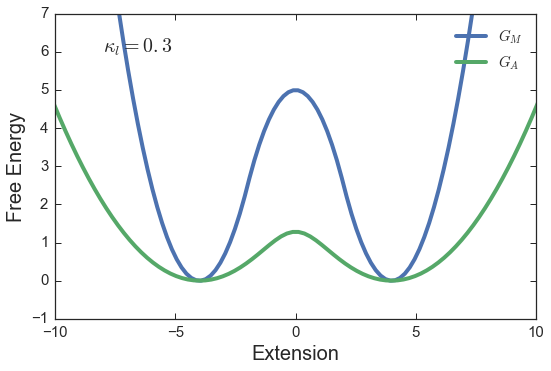

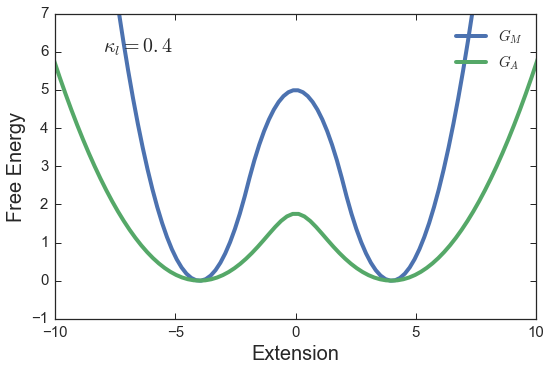

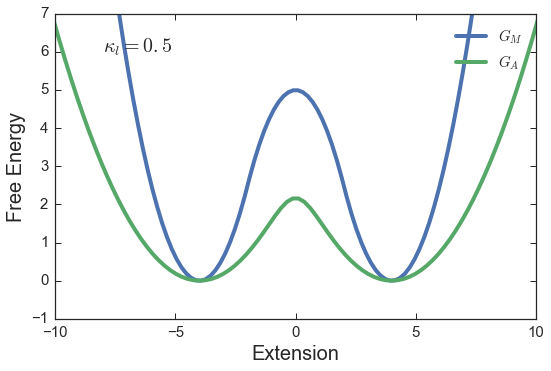

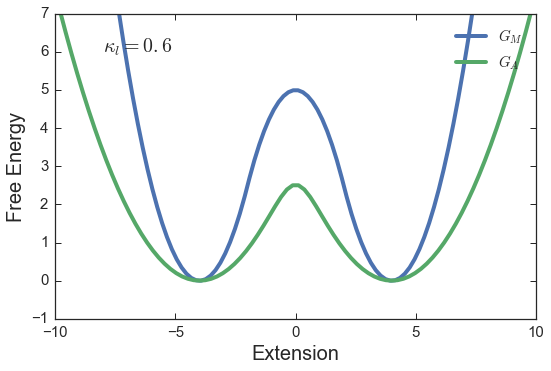

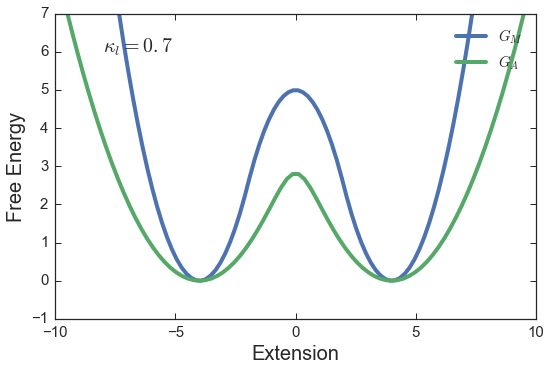

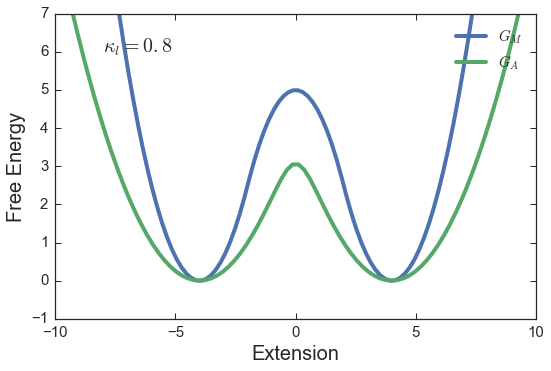

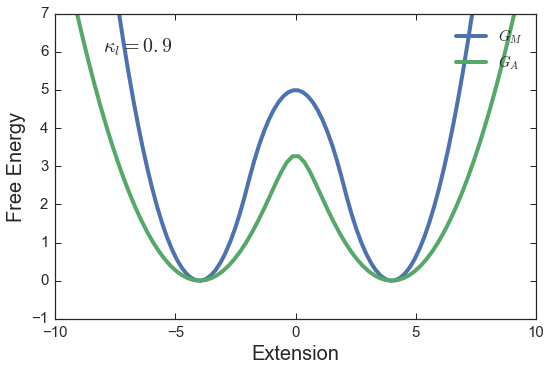

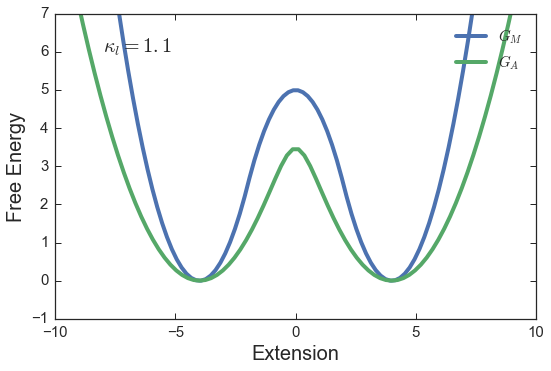

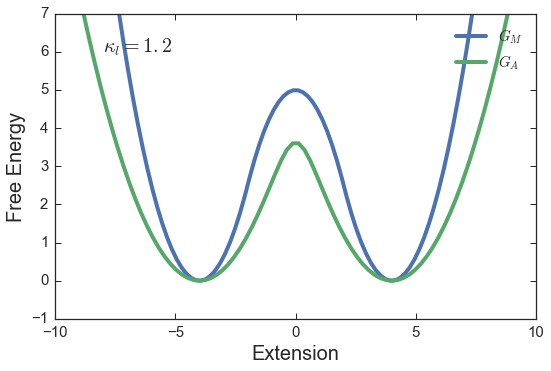

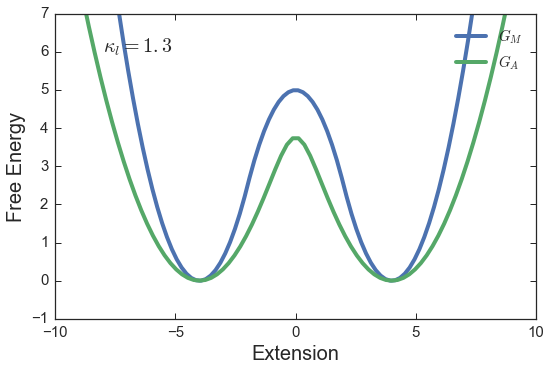

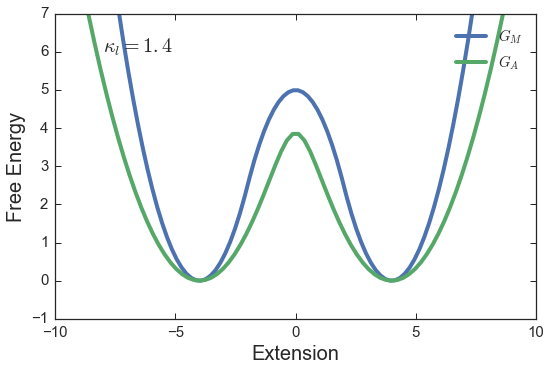

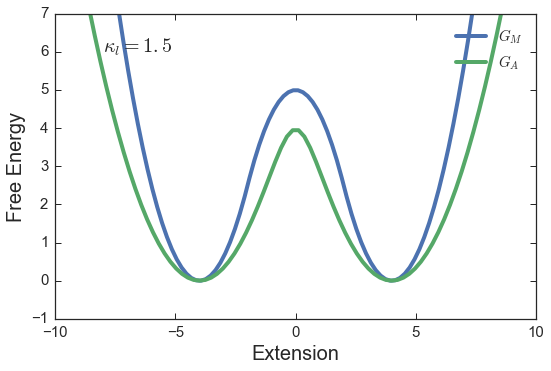

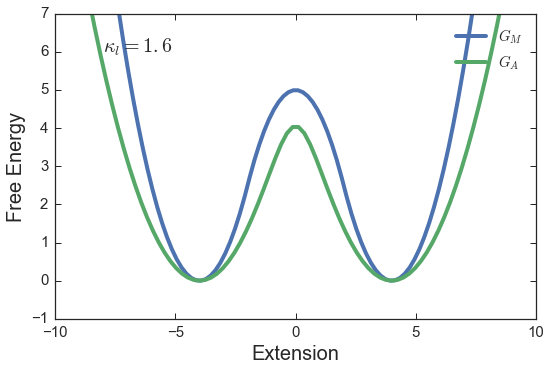

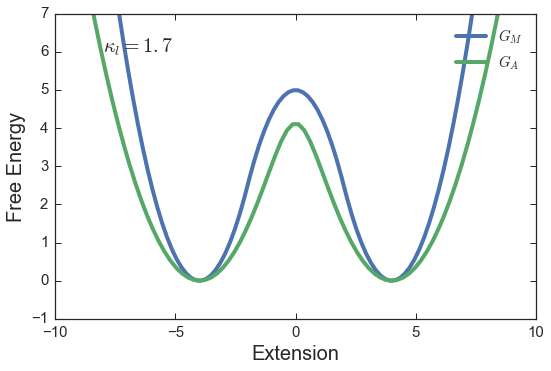

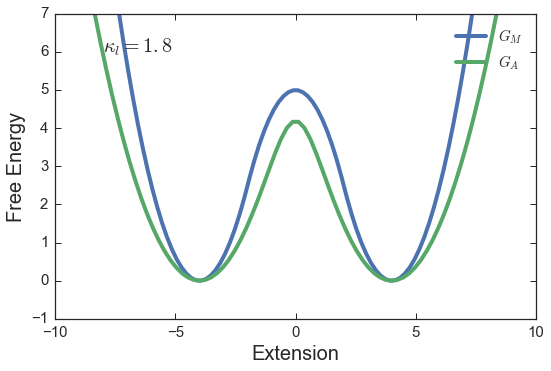

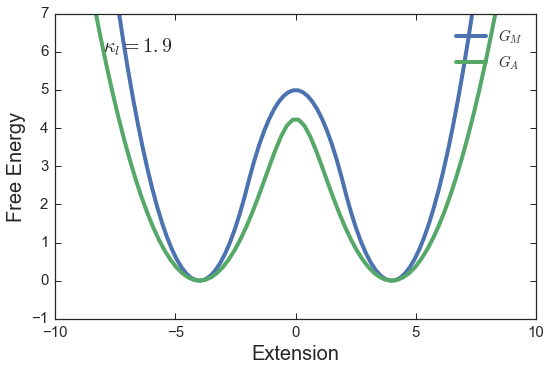

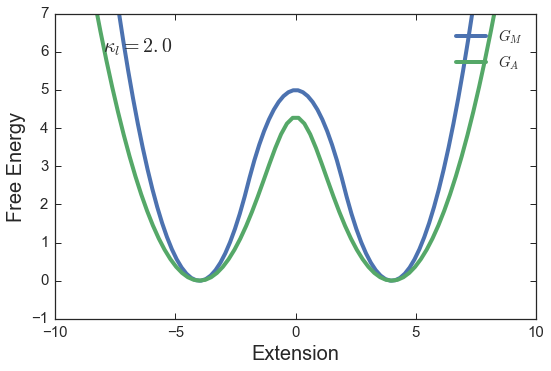

In [6]:
barrier = []
i = 0
for G2d in G2d_all:
    expGM = np.trapz(np.exp(-G2d), q, axis=0)
    GM = -np.log(expGM)
    expGA = np.trapz(np.exp(-G2d), x, axis=1)
    GA = -np.log(expGA)
    fig, ax = plt.subplots()
    ax.plot(x, GM - np.min(GM), label='$G_M$', lw=4)
    ax.plot(q, GA  - np.min(GA), label='$G_A$', lw=4)
    barrier.append(np.max((GA  - np.min(GA))[45:55]))
    #ax.plot(bin_centers, [cossio.Gx(y) for y in bin_centers], '--', c='red', lw=3)
    ax.set_xlim(-10,10)
    ax.set_ylim(-1,7)
    ax.text(-8,6,'$\kappa_l=%2.1f$'%kl_all[i], fontsize=20)
    ax.set_xlabel('Extension', fontsize=20)
    ax.set_ylabel('Free Energy', fontsize=20)
    ax.legend(loc=1)
    i+=1
    fig.tight_layout()

In [7]:
print barrier

[0.0, 0.12830052266513048, 0.72731790764411086, 1.2775618830172224, 1.7501922730852915, 2.154820510179436, 2.5008582424933943, 2.7963485673219131, 3.0482754623145514, 3.2628093329587733, 3.445430410851662, 3.6009824006888027, 3.7337010970398303, 3.8472431501345401, 3.9447253763220296, 4.0287762978460204, 4.1015927101147254, 4.1649995725346667, 4.2205064671534558, 4.2693592233380135]


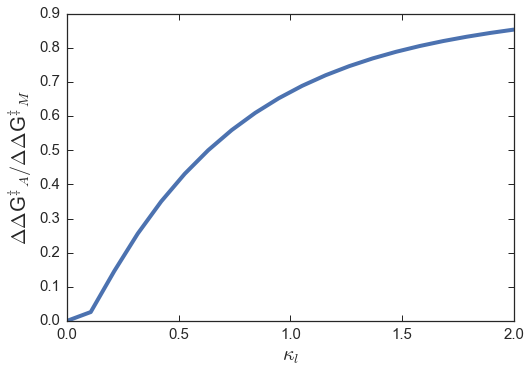

In [8]:
fig, ax = plt.subplots()
ax.plot(kl_all, np.array(barrier)/5., lw=4)
ax.set_ylabel(r'$\Delta\Delta$G${^\ddag}_A/\Delta\Delta$G${^\ddag}_M$', fontsize=20)
ax.set_xlabel(r'$\kappa_l$', fontsize=20)

In [10]:
np.interp(0.75, np.array(barrier)/5., kl_all)


1.2782683665756436